In [1]:
import pandas as pd
import numpy as np
import pickle

In [76]:
data = pickle.load(open('DATA.dat','rb'))

In [77]:
data['X_ref'].shape

(17043, 1292)

In [51]:
len(data)

4

In [52]:
data.keys()

dict_keys(['ID', 'y', 'X_token', 'X_ref'])

In [39]:
b = list(range(10))
b

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [7]:
import seaborn as sns

In [59]:
ref_ans = ['''You need to know how much vinegar was used in each container. You need to know what type of vinegar was used in each container. You need to know what materials to test. You need to know what size/surface area of materials should be used. You need to know how long each sample was rinsed in distilled water.You need to know what drying method to use. You need to know what size/type of container to use.''' , '''Plastic sample B has more stretchability than the other polymer plastics. Plastic sample A has the least amount of stretchability compared to the other polymer plastics. Not all polymer plastics have the same stretchability. Different polymer plastics have different stretchability and are therefore suited for different applications. A reasonable conclusion cannot be drawn due to procedural errors. Provide the before and after measurements for length. Did the samples all start out the same size?. Make sure the samples are all of the same thickness. Variations in thickness could have caused variations in stretchability. Perform additional trials. Some of the samples have similar stretchability A and C, B and D. Two trials may not be enough to conclusively state that one is more stretchable than the other. Indicate how many weights were added to the clamps. Was it the same number for each sample?''', '''A panda and a koala beer are similar because they both eat one type of food. A panda eats bamboo, and a Koala bear eats eucalyptus leaves. They are also both specialists, but a python is a generalist. Meaning they can adapt to their surroundings. Pandas and koala beers can't adapt''','''The word "invasive" means intruding. Invasive species, like the python in the everglades are beginning to threat native species. They are new animals that threat biodiversity. These animals can cause animals to become extinct and are generalist so they can adapt to different environments and affect other people and organism's in and existence''', '''mRNA exits nucleus via nuclear pore.  mRNA travels through the cytoplasm to the ribosome or enters the rough endoplasmic reticulum. mRNA bases are read in triplets called codons (by rRNA). tRNA carrying the complementary (U=A, C+G) anticodon recognizes the complementary codon of the mRNA. The corresponding amino acids on the other end of the tRNA are bonded to adjacent tRNA’s amino acids. A new corresponding amino acid is added to the tRNA. Amino acids are linked together to make a protein beginning with a START codon in the P site (initiation). Amino acids continue to be linked until a STOP codon is read on the mRNA in the A site (elongation and termination).''' ,'''Selective permeability is used by the cell membrane to allow certain substances to move across. Passive transport occurs when substances move from an area of higher concentration to an area of lower concentration. Osmosis is the diffusion of water across the cell membrane. Facilitated diffusion occurs when the membrane controls the pathway for a particle to enter or leave a cell. Active transport occurs when a cell uses energy to move a substance across the cell membrane, and/or a substance moves from an area of low to high concentration, or against the concentration gradient. Pumps are used to move charged particles like sodium and potassium ions through membranes using energy and carrier proteins. Membrane-assisted transport occurs when the membrane of the vesicle fuses with the cell membrane forcing large molecules out of the cell as in exocytosis. Membrane-assisted transport occurs when molecules are engulfed by the cell membrane as in endocytosis. Membrane-assisted transport occurs when vesicles are formed around large molecules as in phagocytosis. Membrane-assisted transport occurs when vesicles are formed around liquid droplets as in pinocytosis. Protein channels or channel proteins allow for the movement of specific molecules or substances into or out of the cell.''', '''Rose is thoughtful and caring. She has plenty of topics or activities in her life that she could be complaining about; however she puts others before herself. For example in the story Aunt Kolab asks Rose if the work she does to help the family 'weighs her down'. Rose did not want to tell her the truth because she did not want to hurt her aunt. Therefore, one can see Rose cares about others emotions and can be characterized as thoughtful''','''Paul finds out that Mr. Leonard was a track star but he could not read. 'No school wanted a runner who couldn't read.' Paul listened to Mr. Leonard about his past and realized that is was similiar to his present. Paul decided that because Mr. Leonard had helped him with track that he needed to help Mr. Leonard out with his reading. 'C'mon, Mr. Leonard, it's time to start your training.''','''The author organizes the article by catching your attention with shocking statements made in the introduction. After that, the author explains three different problems that space junk creates. At the end the author summarizes the article with a conclusion ''','''Black. The doghouse will be warmer. The black lid made the jar warmest. Dark gray. The inside will be a little warmer, but not too hot. The dark gray lid increased 6º C more than the white. Light gray. The inside will stay cooler, but not too cool. The light gray lid was 8º C cooler than the black. White. The inside will be cooler. The white lid only went up to 42º C.''']


In [61]:
lengths     #new lengths

[402, 906, 281, 344, 668, 1292, 441, 388, 256, 370]

max len =  1292


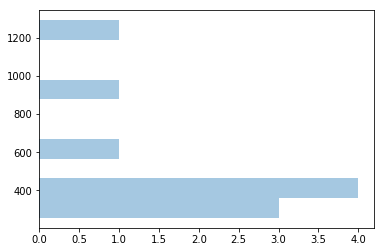

In [62]:
lengths = [len(s) for s in ref_ans]

print('max len = ',max(lengths))
sns.distplot(lengths, vertical = b , bins = 10 , kde = False)

In [63]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
def create_tokenizer(lines):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer

# encode a list of lines
def encode_text(tokenizer, lines, length):
    encoded = tokenizer.texts_to_sequences(lines)
    padded = pad_sequences(encoded, maxlen=length, padding='post')
    return padded

In [64]:
max_length = 1808
max_length_1 = 1292

In [65]:
vocab_size = 15977

In [92]:
embedding_matrix_glove = pickle.load(open('GLOVE_MATRIX.dat','rb'))

In [93]:
embedding_matrix_glove.shape

(15977, 100)

In [94]:
from keras.utils import to_categorical
from keras.models import Model
from keras.layers import Input
from keras.layers import Bidirectional
from keras.layers import Embedding
from keras.models import Sequential
from keras.optimizers import Adam

from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation

from keras import backend as K, initializers, regularizers, constraints
from keras.engine.topology import Layer

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
callbacks = [
     EarlyStopping(monitor='val_acc' , patience = 5 , verbose=1)
    #ModelCheckpoint(kfold_weights_path, monitor='val_loss', save_best_only=True, verbose=0),
]

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from keras.utils import to_categorical
import ml_metrics as m

In [95]:

def dot_product(x, kernel):
    return K.squeeze(K.dot(x, K.expand_dims(kernel)), axis=-1)


class Attention(Layer):
    def __init__(self,
                 W_regularizer=None, b_regularizer=None,
                 W_constraint=None, b_constraint=None,
                 bias=True,
                 return_attention=False,
                 **kwargs):
        """
        # Input shape
            3D tensor with shape: `(samples, steps, features)`.
        # Output shape
            2D tensor with shape: `(samples, features)`.

        Example:
            # 1
            model.add(LSTM(64, return_sequences=True))
            model.add(Attention())
            # next add a Dense layer
            # 2 - Get the attention scores
            hidden = LSTM(64, return_sequences=True)(words)
            sentence, word_scores = Attention(return_attention=True)(hidden)
        """
        self.supports_masking = True
        self.return_attention = return_attention
        self.init = initializers.get('glorot_uniform')

        self.W_regularizer = regularizers.get(W_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)

        self.W_constraint = constraints.get(W_constraint)
        self.b_constraint = constraints.get(b_constraint)

        self.bias = bias
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
#        assert len(input_shape) == 3

        self.W = self.add_weight((input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_W'.format(self.name),
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        if self.bias:
            self.b = self.add_weight((input_shape[1],),
                                     initializer='zero',
                                     name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)
        else:
            self.b = None

        self.built = True

    def compute_mask(self, input, input_mask=None):
        # do not pass the mask to the next layers
        return None

    def call(self, x, mask=None):
        eij = dot_product(x, self.W)

        if self.bias:
            eij += self.b

        eij = K.tanh(eij)

        a = K.exp(eij)

        # apply mask after the exp. will be re-normalized next
        if mask is not None:
            # Cast the mask to floatX to avoid float64 upcasting in theano
            a *= K.cast(mask, K.floatx())

        # in some cases especially in the early stages of training the sum may be almost zero
        # and this results in NaN's. A workaround is to add a very small positive number ε to the sum.
        # a /= K.cast(K.sum(a, axis=1, keepdims=True), K.floatx())
        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())

        weighted_input = x * K.expand_dims(a)

        result = K.sum(weighted_input, axis=1)

        if self.return_attention:
            return [result, a]
        return result

    def compute_output_shape(self, input_shape):
        if self.return_attention:
            return [(input_shape[0], input_shape[-1]),
                    (input_shape[0], input_shape[1])]
        else:
            return input_shape[0], input_shape[-1]

In [96]:
import re
import os as os
import numpy as np
import itertools
from sklearn import preprocessing

In [97]:
def convert_labels (trainY):
    le = preprocessing.LabelEncoder()
    le.fit(trainY)
    temp1 = le.transform(trainY)
    return to_categorical(temp1,4), le.classes_, trainY

_,lable_encoding,_=convert_labels(data['y'])

def get_class_from_pred(pred):
    return [lable_encoding[x.argmax()] for x in pred]

In [98]:
def define_model(learning_rate,dropout,lstm_out,n_hidden_layer,em,em_trainable_flag):
    input_sentence= Input(shape=(max_length,),name='Sentence')    
    input_reference = Input(shape=(max_length_1,),name='Reference')
    
    embedding=Embedding(vocab_size, len(eval(em)[0]), weights = [eval(em)],input_length=max_length,trainable = False)
    emb_ref=Embedding(vocab_size, len(eval(em)[0]), weights = [eval(em)],input_length=max_length_1,trainable = False)

    context = embedding(input_sentence)
    reference = emb_ref(input_reference)
    
    combined= concatenate([context, reference], axis = 1)
    combined=Dropout(0.5)(combined)
    c = Conv1D(150,5,activation='relu')(combined)
    
    hidden,_,_,_,_ = Bidirectional(LSTM(300, return_sequences=True, return_state = True, dropout=0.25, recurrent_dropout=0.1))(c)
    
    a = Attention()(hidden)
    #a = AveragePooling1D(a)

    x=Dense(300,activation='relu')(a)
        
    output=Dense(4,activation='softmax')(x)

    model= Model(inputs=[input_sentence,input_reference] ,outputs=output)
    
    optimizer = Adam(lr=learning_rate)
    
    model.compile(loss = 'categorical_crossentropy', optimizer=optimizer,metrics=['accuracy'])
    

    
    return model

from keras.layers import Lambda,Reshape,concatenate,Input, Embedding, LSTM

In [ ]:
from sklearn.model_selection import train_test_split
count=0;
test_count=0;
cvscores = []
final_Core= [] 
ID=[]
NUMBER=[]

for i in np.unique(data['ID']):

        #print (train_index , test_index)
    X_train, X_test, y_train, y_test = train_test_split(data['X_token'],data['y'],test_size = 0.2 , random_state=0)
    X_train, X_test, X_ref_train, X_ref_test = train_test_split(data['X_token'],data['X_ref'],test_size = 0.2 , random_state=0)

  #  print (X_train.shape, y_train.shape)
    y_train = to_categorical(y_train , 4)
    y_test = to_categorical(y_test , 4)

    model = define_model(learning_rate=0.01,
                     dropout=0.5,
                     lstm_out=300,
                     n_hidden_layer=1,
                     em='embedding_matrix_glove',
                     em_trainable_flag=False
                    )

    EarlyStop= EarlyStopping(monitor='val_loss',patience=5,verbose=1)

    
    model.fit(x=[X_train,X_ref_train],y=y_train, epochs=1,batch_size=16,
              callbacks=[EarlyStop],validation_data=([X_test,X_ref_test],y_test))

    pred = model.predict([X_test,X_ref_test])
    out= get_class_from_pred(pred)
    actual= get_class_from_pred(y_test)

    print('Kappa: ', m.quadratic_weighted_kappa(actual,out))

In [ ]:
embedding_matrix_glove.shape

In [73]:
data['X_token'].shape

(17043, 1808)

In [78]:
data['X_ref'].shape

(17043, 1292)

In [75]:
data['y'].shape

(17043,)